<a href="https://colab.research.google.com/github/MiguelR0462/Integracion_de_Datos_y_Prospectiva/blob/main/Reto_2_Teoria_de_la_Credibilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Estudio - Integración de Datos y Teoria de la Credibilidad



In [1]:
# 0. Cargamos las librerias de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 2. cargamos los archivos
path1 = '/content/drive/MyDrive/Universidad/Semestre 8/Integracion de Datos y Prospectiva de Riesgo/Archivos/1. FallasTecnológicas.xlsx'
path2 = '/content/drive/MyDrive/Universidad/Semestre 8/Integracion de Datos y Prospectiva de Riesgo/Archivos/2. AdmonEjecProcesos.xlsx'
df1 = pd.read_excel(path1)
df2 = pd.read_excel(path2)

In [4]:
df1

,Fallas Tecnológicas (Canales Electronicos),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
1,2009-01-01 00:00:00,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
2,2009-01-02 00:00:00,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
3,2009-01-03 00:00:00,70,9.976,5,0.4269,"Errores visuales menores, problemas de usabili..."
4,2009-01-04 00:00:00,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
...,...,...,...,...,...,...
697,2011-12-13 00:00:00,120,12.4392,1,0.5747,"Errores visuales menores, problemas de usabili..."
698,2011-12-14 00:00:00,115,16.589,6,0.7209,"Errores visuales menores, problemas de usabili..."
699,2011-12-15 00:00:00,115,24.3684,10,0.3628,"Errores visuales menores, problemas de usabili..."
700,2011-12-16 00:00:00,80,9.677,4,0.2715,"Errores visuales menores, problemas de usabili..."


In [5]:
# 3. limpiamos el df1

# cambiamos los titulos de las columnas por los de la primera fila
df1.columns = df1.iloc[0]
df1 = df1[1:].reset_index(drop=True)

# eliminamos las columnas innecesarias para el LDA (fecha, transacciones diarias, valor generado y descripcion evento)
df1 = df1.drop(['Fechas',
                'Transacciones Diarias',
                'Valor Generado Promedio (Millones)',
                'Descripción Evento',
                ], axis=1)
# revisamos si hay valores nulos
df1.isnull().sum() # Nota: no habia valores nulos

df1.head(5)

,Valor Transado (millones),Transacciones Fallidas (Freq)
0,14.8058,1
1,56.4721,4
2,9.976,5
3,18.2949,6
4,23.4112,7


In [6]:
# 4. limpiamos el df2
df2
# eliminamos las columnas innecesarias para el LDA (Fechas, Transacciones Diarias y Valor Generado)
df2 = df2.drop(['Fechas',
                'Transacciones Diarias',
                'Valor Generado (millones)',
                ], axis=1)
# revisamos si hay valores nulos
df2.isnull().sum() # nota: tampoco habian valores nulos

df2.head(5)

,Valor Transado (millones),Transacciones Fallidas
0,358.3637,5
1,742.8517,7
2,646.6903,9
3,653.5397,3
4,636.6142,4


In [10]:
# 5. Hacemos la LDA de ambos df
# Clarifiacion: de ahora en mas, el df1 son los datos observados
# y el df2 son los datos externos

# df1
Freqo = df1.iloc[:,1]
Sevo = df1.iloc[:,0]
LDAo = Freqo*Sevo

#df2
Freqe = df2.iloc[:,1]
Seve = df2.iloc[:,0]
LDAe = Freqe*Seve

In [11]:
# 6. Creamos la funcion para caracterizar
def caracterizacion(LDA):

  #Se procede con la creación de la distribución
  plt.figure(figsize=(10,5))
  sns.histplot(LDA,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  #Se procede con la caracterización de cada una de las variables
  np.set_printoptions(suppress=True)
  NI=10    #Indica el número de clusters
  counts,bin_edges=np.histogram(LDA,bins=NI)
  print("El número de datos por intervalo es:")
  print(counts)
  print("Los intervalos inferiores:")
  print(bin_edges[:-1])
  print("Los intervalos superiores:")
  print(bin_edges[1:])
  XC=(bin_edges[:-1]+bin_edges[1:])/2

  #Se configura la tabla de los datos
  Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
  df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
  df.head(10)

  #Se procede con la estimación de la media
  fr=counts/np.sum(counts)
  u=np.sum(XC*fr)
  sigma2=np.sum(fr*(XC-u)**2)
  sigma=np.sqrt(sigma2)
  Cas=np.sum(fr*(XC-u)**3)/sigma**3
  Kur=(np.sum(fr*(XC-u)**4)/sigma**4)-3

  return u,sigma,Cas,Kur,df

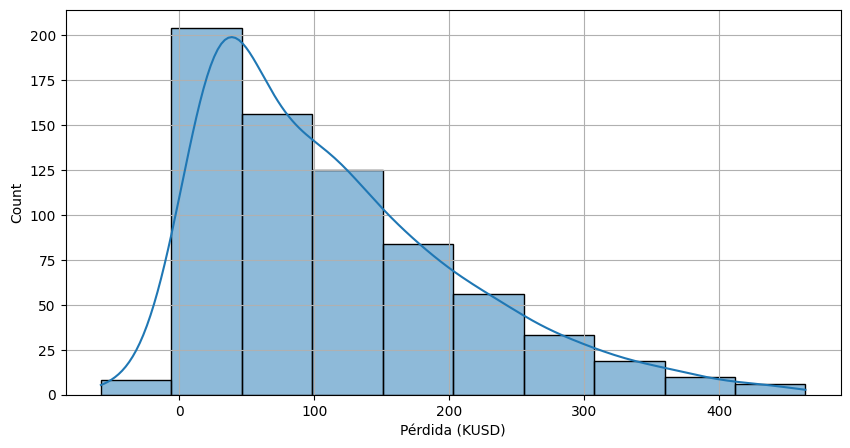

El número de datos por intervalo es:
[  8 204 156 125  84  56  33  19  10   6]
Los intervalos inferiores:
[-58.031400000000005 -5.840190000000007 46.35101999999999
 98.54222999999998 150.73343999999997 202.92464999999999
 255.11585999999994 307.30706999999995 359.49827999999997 411.68949]
Los intervalos superiores:
[-5.840190000000007 46.35101999999999 98.54222999999998 150.73343999999997
 202.92464999999999 255.11585999999994 307.30706999999995
 359.49827999999997 411.68949 463.8807]
La media de los datos observados es: 114.8845560984308
El coeficiente de asimetria de los datos observados es: 1.023148691010904


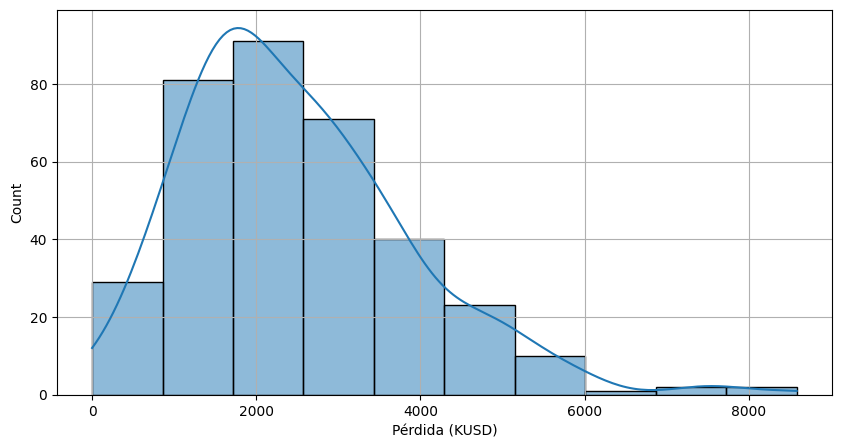

El número de datos por intervalo es:
[29 81 91 71 40 23 10  1  2  2]
Los intervalos inferiores:
[   0.       858.55044 1717.10088 2575.65132 3434.20176 4292.7522
 5151.30264 6009.85308 6868.40352 7726.95396]
Los intervalos superiores:
[ 858.55044 1717.10088 2575.65132 3434.20176 4292.7522  5151.30264
 6009.85308 6868.40352 7726.95396 8585.5044 ]
La media de los datos externos es: 2519.2322910857138
El coeficiente de asimetria de los datos externos es: 0.898895666539819
La credibilidad de los datos es: 0.0007263167619907529
Las perdidas esperadas (o franquicia) son: 2517.485973024138


In [12]:
# 7. Comparamos estadisticamente los datos (media, varianza, desviacion,
# asimetria, kurtosis)

# 7.1. Base de datos observados - df1
uo, sigmao, Caso, Kuo, dfo = caracterizacion(LDAo)
print("La media de los datos observados es:",uo)
print("El coeficiente de asimetria de los datos observados es:",Caso)

# 7.2. Base de datos Externa - df2
ue, sigmae, Case, Kue, dfe = caracterizacion(LDAe)
print("La media de los datos externos es:",ue)
print("El coeficiente de asimetria de los datos externos es:",Case)

# 8. Teoria de la credibilidad

# 8.1. Media Hipotetica
NDo = len(LDAo); NDe = len(LDAe) # Para saber la inercia de los datos
uhat = (NDo*uo+NDe*ue)/(NDo+NDe)

# 8.2 EPV: Valor Esperado de la varianza
EPV=(NDo*sigmao**2+NDe*sigmae**2)/(NDo+NDe) # determinar la varianza conjunta de los datos

# 8.3 VHM: Varianza Hipotetica de la Media
VHM=((NDo*uo**2+NDe*ue**2)/(NDo+NDe))-uhat**2

# 8.4 Factor de Credibilidad

fc = EPV/VHM

# 8.5 Credibilidad de la Base de Datos
Cr=1-(NDo/(NDo+fc))
print("La credibilidad de los datos es:",Cr)

# ==============================================================================

# 9. Parametros de riesgo

#9.1 Franquicia - Perdidas Esperadas (Asumibles)

PEs=Cr*uo+(1-Cr)*ue
print("Las perdidas esperadas (o franquicia) son:",PEs)

**Analisis de Credibilidad**

Para este análisis trabajamos dos bases de datos de riesgo operacional: fallas tecnológicas en canales electrónicos (datos observados - df1) y administración y ejecución de procesos (datos externos - df2). A partir de ambas construimos LDA para evaluar si los datos externos podían enriquecer los propios bajo el marco de la Teoría de la Credibilidad.

La diferencia entre ambas fuentes resultó ser el hallazgo más relevante. Mientras los datos observados tienen una media de pérdida de mas o menos 114.88 millones, los datos externos registraron 2,519.23 millones, una escala aproximadamente 22 veces mayor.

La única similitud notable fue la forma de ambas distribuciones, con coeficientes de asimetría positiva cercanos a 1.0, lo que indica que en los dos casos las pérdidas extremas, aunque poco frecuentes, sí ocurren.

El factor de credibilidad obtenido fue de aproximadamente 0.0007, prácticamente cero, lo que significa que los datos observados casi no tienen peso en la estimación combinada. Las pérdidas esperadas finales (2,517 millones) terminan siendo casi idénticas a la media externa, como si los datos propios no aportaran información relevante. Esto se explica porque la brecha entre las medias es tan grande que el modelo concluye que ambas fuentes no están midiendo el mismo fenómeno.

En conclusión, los datos externos no enriquecen los observados bajo este criterio, los desplazan por completo, señal de que describen exposiciones al riesgo de magnitudes distintas e incompatibles en escala. Por eso, no integraria estas bases de datos para hacer analisis o prospeccion de riesgos; adicionalmente, investigué usando el marco para banca de Basilea (visto en el reto pasado) y encontré que Fallas en canales electronicos y administracion y ejecucion de procesos, son subcategorias distintas, que tienen causas, controles y distribuciones distintas. Entonces, por esto tambien, las bases de datos no deberian integrarse.